# **Khởi tạo**

**Import thư viện**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import os


**Xử lý dữ liệu**

In [89]:
def read_file(file_name):
    data = pd.read_csv(file_name)

    # Chuyển cột 'Date' thành kiểu dữ liệu datetime và đặt làm index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Chuyển đổi các cột khác sang dạng số nếu cần thiết
    data['Price'] = data['Price'].str.replace(',', '').astype(float)
    data = data[['Price']]

    # Sắp xếp dữ liệu theo thời gian từ quá khứ đến hiện tại
    data.sort_index(inplace=True)

    return data

**Xây dựng mô hình**

In [90]:
# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [129]:
def LinearRegression_prediction(name, data, train_test_ratio=0.8, days=30):
    
    # Tính toán số lượng điểm dữ liệu cho tập train và tập test
    train_size = int(len(data) * train_test_ratio)

    # Tạo tập train và tập test
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]

    # Tạo features và target cho tập train và tập test
    X_train, y_train = np.array(range(train_size)).reshape(-1, 1), train['Price'].values
    X_test, y_test = np.array(range(train_size, len(data))).reshape(-1, 1), test['Price'].values

    # Xây dựng mô hình Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán giá trên tập test
    y_pred_test = model.predict(X_test)

    # Dự đoán giá các ngày tiếp theo
    next_days_index = np.arange(len(data), len(data) + days).reshape(-1, 1)
    y_pred_next_days = model.predict(next_days_index)
    
    # Đánh giá độ chính xác thuật toán bằng RMSE
    test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
    print('Testing RMSE:', test_rmse)

    # Đánh giá độ chính xác thuật toán bằng MAE
    test_mae = mean_absolute_error(y_test, y_pred_test)
    print('Testing MAE:', test_mae)
    
    # Đánh giá độ chính xác thuật toán bằng MAPE
    test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
    print('Testing MAPE:', test_mape)

    # Trực quan hóa kết quả
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[:train_size], train['Price'], color='blue', label='Train Data')
    plt.plot(data.index[train_size:], test['Price'], color='orange', label='Test Data')
    plt.plot(data.index[train_size:], y_pred_test, color='green', label='Predictions on Test Data')
    plt.plot(pd.date_range(start=data.index[-1], periods=days), y_pred_next_days[-days:], color='red', label='Predictions for Next '+str(days)+' Days')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Linear Regression {} ({})'.format(train_test_ratio, name))
    plt.legend()
    plt.show()


    # Lưu ảnh
    save_dir = r'C:\Users\My PC\Downloads\image\LN'
    custom_name = 'LinearRegression_' + name + '_' + str(days) + 'days_' + str(int(train_test_ratio*10)) + str(int(10-train_test_ratio*10))
    image_name = f'{custom_name}.png'  # Tạo tên tệp động
    save_path = os.path.join(save_dir, image_name)
    plt.savefig(save_path, format='png')


# **BIDV**

In [130]:
data = read_file("../Dataset/BID Historical Data.csv");
name = 'BIDV'

## **30 ngày**

**BIDV 7:3**

Testing RMSE: 4163.263583901842
Testing MAE: 3495.940685668715
Testing MAPE: 8.636873885517279


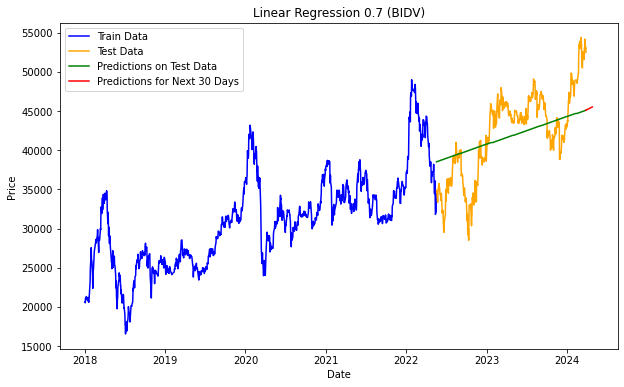

<Figure size 432x288 with 0 Axes>

In [131]:
LinearRegression_prediction(name, data, 0.7, 30)

**BIDV 8:2**

Testing RMSE: 5320.8628474154475
Testing MAE: 4595.571364031361
Testing MAPE: 9.835324341972099


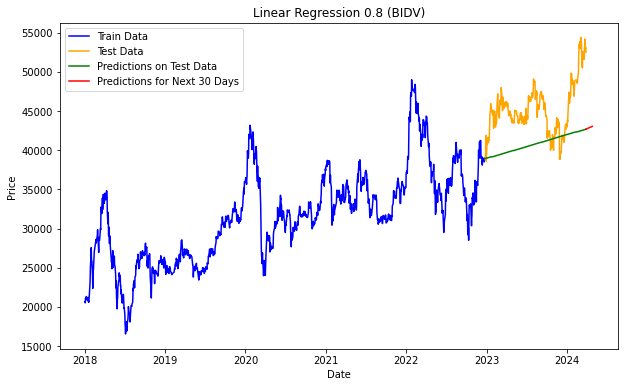

<Figure size 432x288 with 0 Axes>

In [94]:
LinearRegression_prediction(name, data, 0.8, 30)

**BIDV 9:1**

Testing RMSE: 4152.676501424429
Testing MAE: 3433.859241100819
Testing MAPE: 7.263415767936514


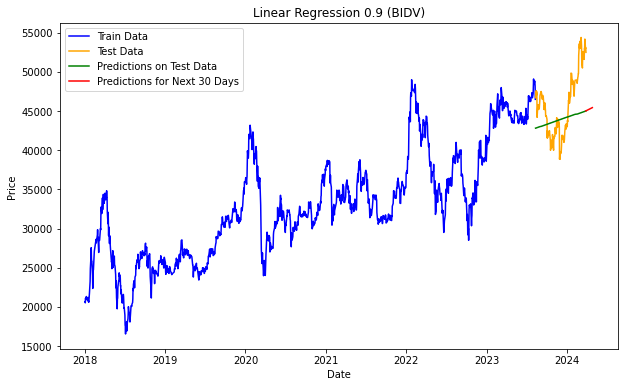

<Figure size 432x288 with 0 Axes>

In [95]:
LinearRegression_prediction(name, data, 0.9, 30)

## **60 ngày**

**BIDV 7:3**

Testing RMSE: 4163.263583901842
Testing MAE: 3495.940685668715
Testing MAPE: 8.636873885517279


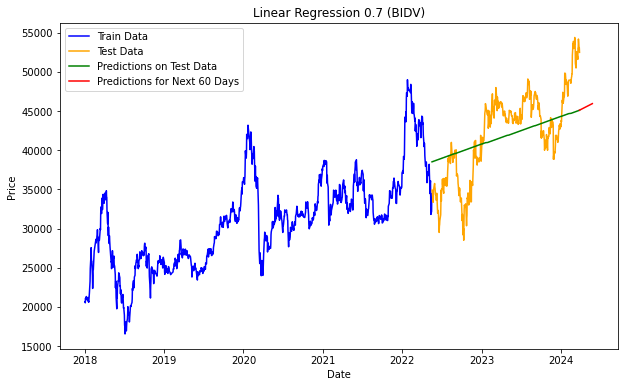

<Figure size 432x288 with 0 Axes>

In [96]:
LinearRegression_prediction(name, data, 0.7, 60)

**BIDV 8:2**

Testing RMSE: 5320.8628474154475
Testing MAE: 4595.571364031361
Testing MAPE: 9.835324341972099


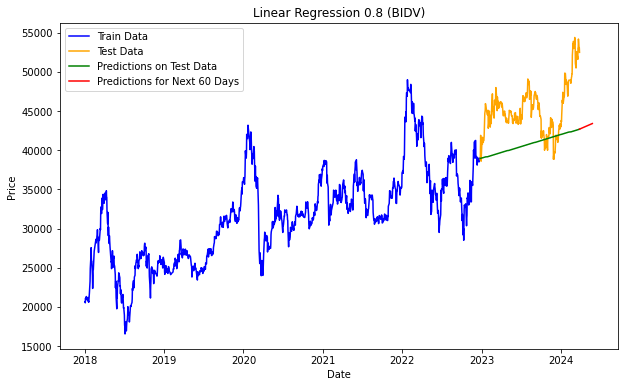

<Figure size 432x288 with 0 Axes>

In [97]:
LinearRegression_prediction(name, data, 0.8, 60)

**BIDV 9:1**

Testing RMSE: 4152.676501424429
Testing MAE: 3433.859241100819
Testing MAPE: 7.263415767936514


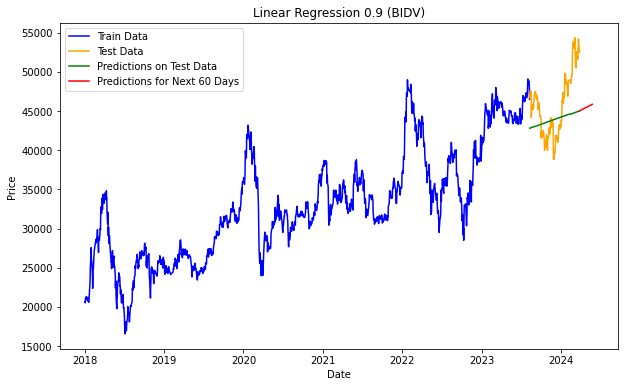

<Figure size 432x288 with 0 Axes>

In [98]:
LinearRegression_prediction(name, data, 0.9, 60)

## **90 ngày**

**BIDV 7:3**

Testing RMSE: 4163.263583901842
Testing MAE: 3495.940685668715
Testing MAPE: 8.636873885517279


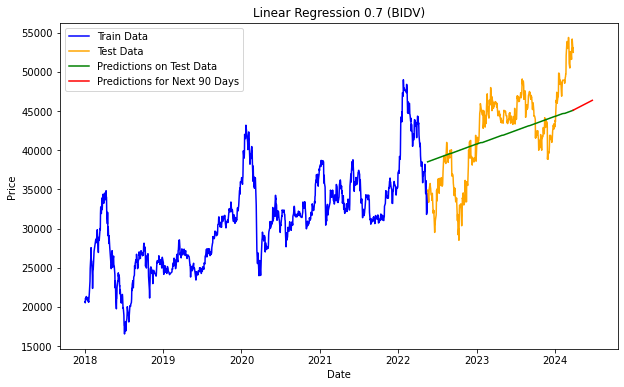

<Figure size 432x288 with 0 Axes>

In [99]:
LinearRegression_prediction(name, data, 0.7, 90)

**BIDV 8:2**

Testing RMSE: 5320.8628474154475
Testing MAE: 4595.571364031361
Testing MAPE: 9.835324341972099


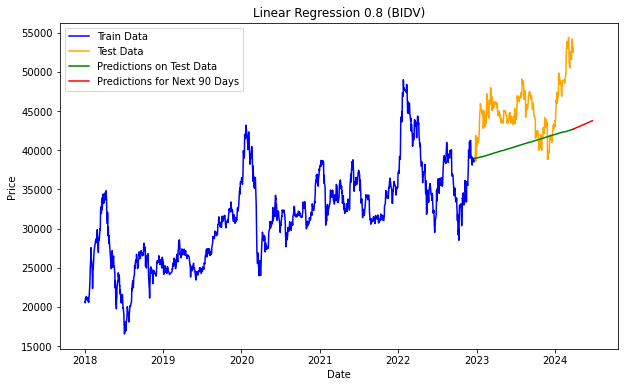

<Figure size 432x288 with 0 Axes>

In [100]:
LinearRegression_prediction(name, data, 0.8, 90)

**BIDV 9:1**

Testing RMSE: 4152.676501424429
Testing MAE: 3433.859241100819
Testing MAPE: 7.263415767936514


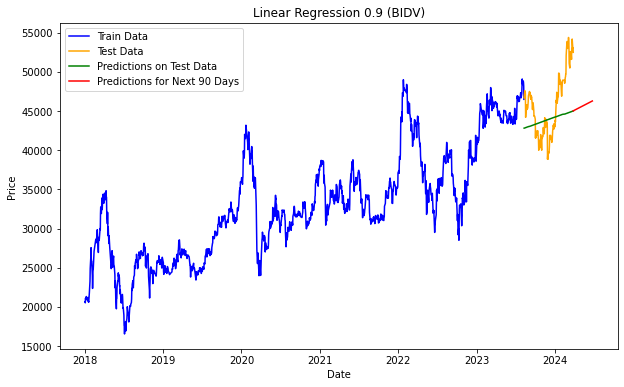

<Figure size 432x288 with 0 Axes>

In [101]:
LinearRegression_prediction(name, data, 0.9, 90)

# **VCB**

In [102]:
data = read_file("../Dataset/VCB Historical Data.csv");
name = 'VCB'

## **30 ngày**

**VCB 7:3**

Testing RMSE: 10516.51416533562
Testing MAE: 9124.137697304415
Testing MAPE: 11.160212739106807


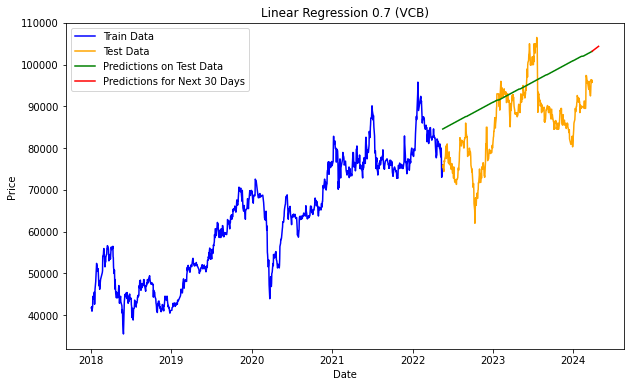

<Figure size 432x288 with 0 Axes>

In [103]:
LinearRegression_prediction(name, data, 0.7)

**VCB 8:2**

Testing RMSE: 6513.819588601493
Testing MAE: 5312.009066294467
Testing MAPE: 5.8230244047910675


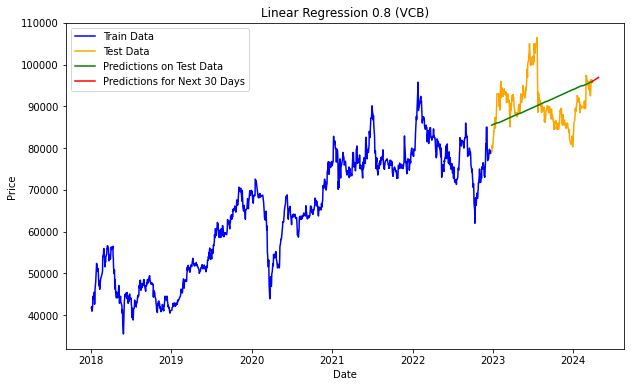

<Figure size 432x288 with 0 Axes>

In [104]:
LinearRegression_prediction(name, data, 0.8)

**VCB 9:1**

Testing RMSE: 7900.247902724971
Testing MAE: 7158.703063292112
Testing MAPE: 8.260333890012395


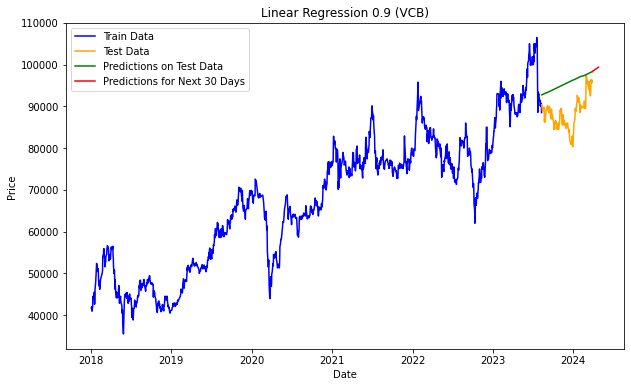

<Figure size 432x288 with 0 Axes>

In [105]:
LinearRegression_prediction(name, data, 0.9)

## **60 ngày**

**VCB 7:3**

Testing RMSE: 10516.51416533562
Testing MAE: 9124.137697304415
Testing MAPE: 11.160212739106807


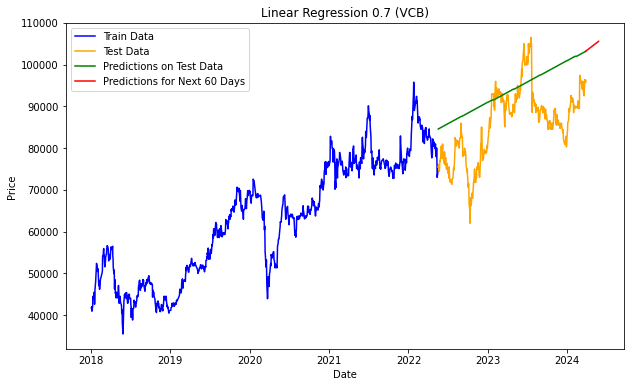

<Figure size 432x288 with 0 Axes>

In [106]:
LinearRegression_prediction(name, data, 0.7, 60)

**VCB 8:2**

Testing RMSE: 6513.819588601493
Testing MAE: 5312.009066294467
Testing MAPE: 5.8230244047910675


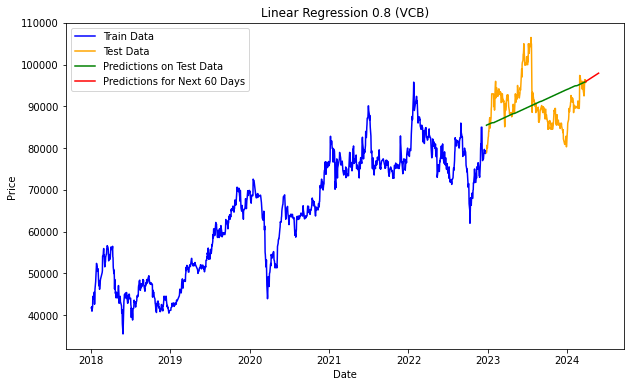

<Figure size 432x288 with 0 Axes>

In [107]:
LinearRegression_prediction(name, data, 0.8, 60)

**VCB 9:1**

Testing RMSE: 7900.247902724971
Testing MAE: 7158.703063292112
Testing MAPE: 8.260333890012395


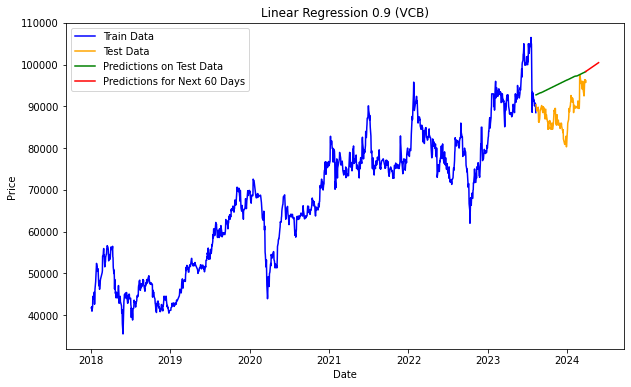

<Figure size 432x288 with 0 Axes>

In [108]:
LinearRegression_prediction(name, data, 0.9, 60)

## **90 ngày**

**VCB 7:3**

Testing RMSE: 10516.51416533562
Testing MAE: 9124.137697304415
Testing MAPE: 11.160212739106807


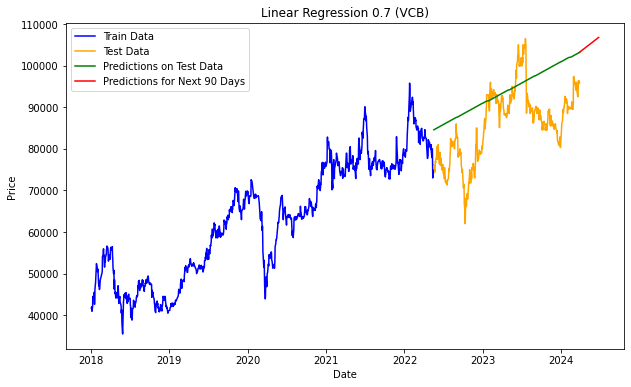

<Figure size 432x288 with 0 Axes>

In [109]:
LinearRegression_prediction(name, data, 0.7, 90)

**VCB 8:2**

Testing RMSE: 6513.819588601493
Testing MAE: 5312.009066294467
Testing MAPE: 5.8230244047910675


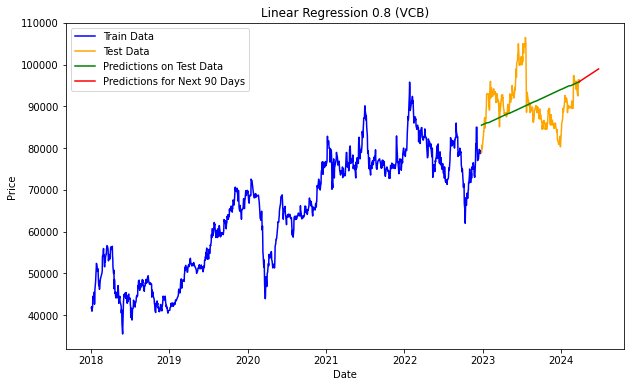

<Figure size 432x288 with 0 Axes>

In [110]:
LinearRegression_prediction(name, data, 0.8, 90)

**VCB 9:1**

Testing RMSE: 7900.247902724971
Testing MAE: 7158.703063292112
Testing MAPE: 8.260333890012395


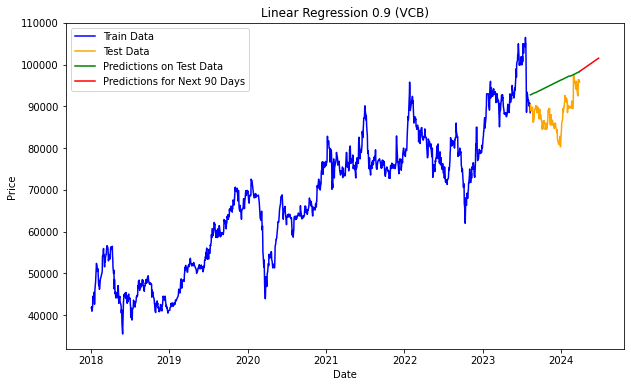

<Figure size 432x288 with 0 Axes>

In [111]:
LinearRegression_prediction(name, data, 0.9, 90)

# **MBB**

In [112]:
data = read_file("../Dataset/MBB Historical Data.csv");
name = 'MBB'

## **30 ngày**

**MBB 7:3**

Testing RMSE: 6699.874284360448
Testing MAE: 6089.0796965462305
Testing MAPE: 32.65018756655115


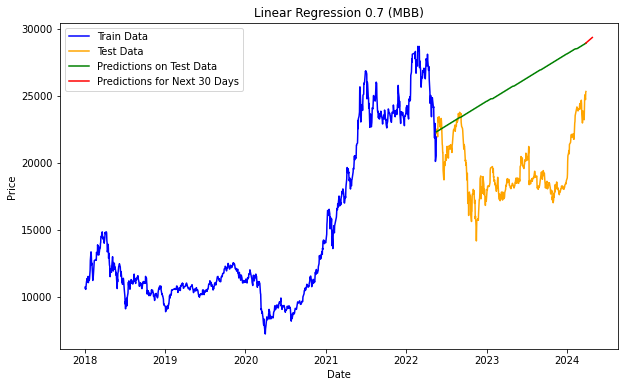

<Figure size 432x288 with 0 Axes>

In [113]:
LinearRegression_prediction(name, data, 0.7, 30)

**MBB 8:2**

Testing RMSE: 5730.2877896230475
Testing MAE: 5514.895855180515
Testing MAPE: 29.412335006254274


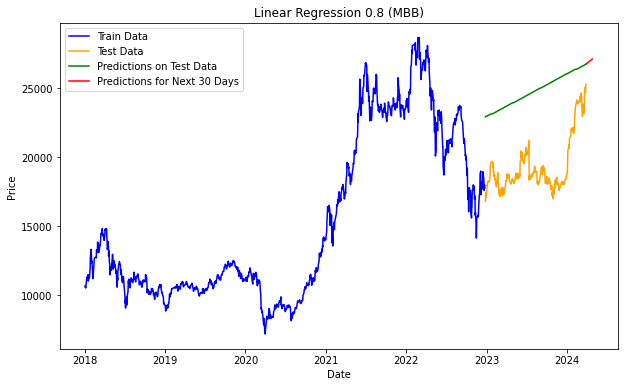

<Figure size 432x288 with 0 Axes>

In [114]:
LinearRegression_prediction(name, data, 0.8, 30)

**MBB 9:1**

Testing RMSE: 4114.666840978924
Testing MAE: 3621.5548357284315
Testing MAPE: 19.495638718960933


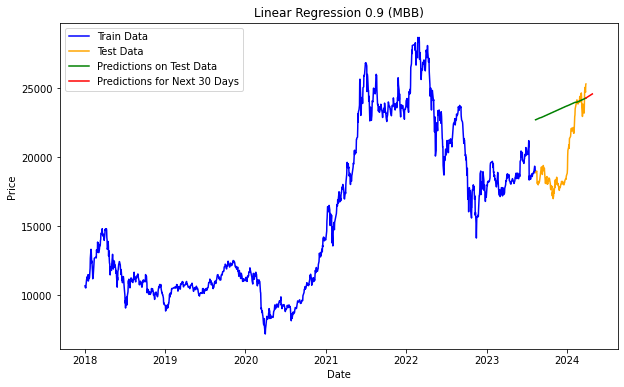

<Figure size 432x288 with 0 Axes>

In [115]:
LinearRegression_prediction(name, data, 0.9, 30)

## **60 ngày**

**MBB 7:3**

Testing RMSE: 6699.874284360448
Testing MAE: 6089.0796965462305
Testing MAPE: 32.65018756655115


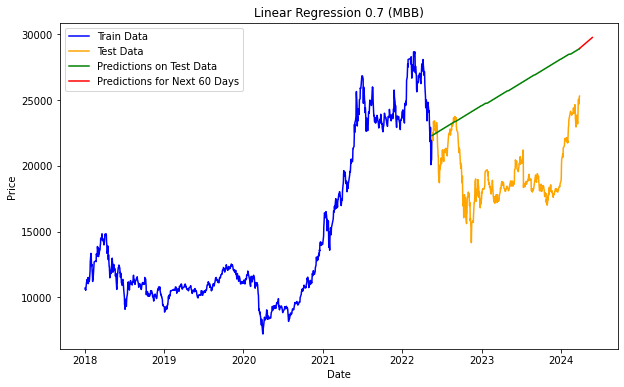

<Figure size 432x288 with 0 Axes>

In [116]:
LinearRegression_prediction(name, data, 0.7, 60)

**MBB 8:2**

Testing RMSE: 5730.2877896230475
Testing MAE: 5514.895855180515
Testing MAPE: 29.412335006254274


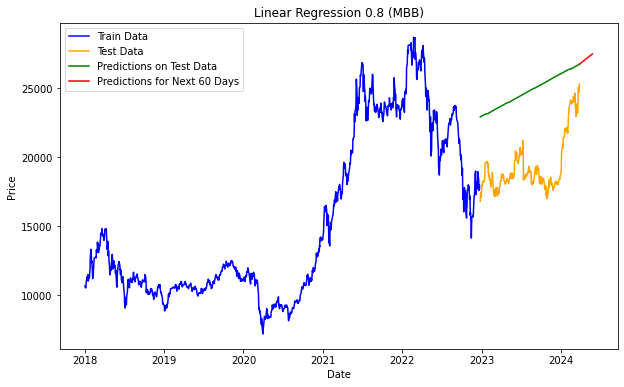

<Figure size 432x288 with 0 Axes>

In [117]:
LinearRegression_prediction(name, data, 0.8, 60)

**MBB 9:1**

Testing RMSE: 4114.666840978924
Testing MAE: 3621.5548357284315
Testing MAPE: 19.495638718960933


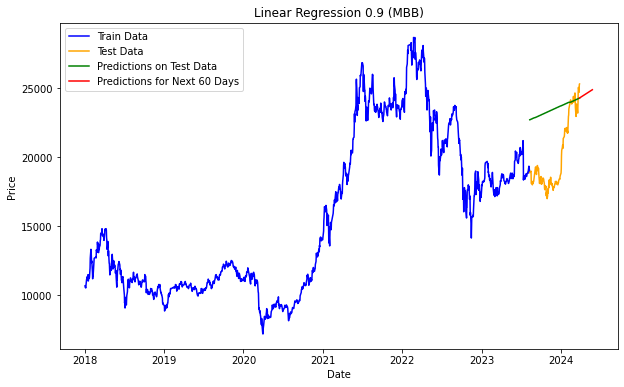

<Figure size 432x288 with 0 Axes>

In [118]:
LinearRegression_prediction(name, data, 0.9, 60)

## **90 ngày**

**MBB 7:3**

Testing RMSE: 6699.874284360448
Testing MAE: 6089.0796965462305
Testing MAPE: 32.65018756655115


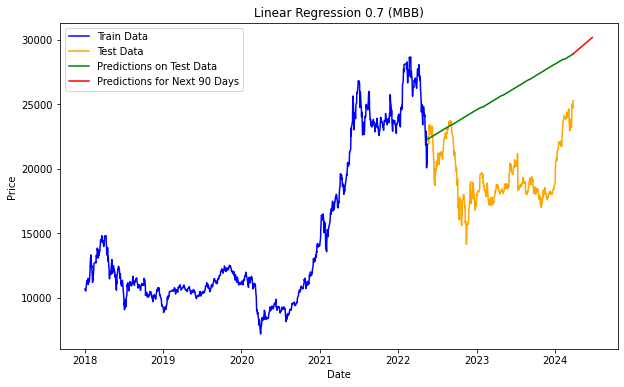

<Figure size 432x288 with 0 Axes>

In [119]:
LinearRegression_prediction(name, data, 0.7, 90)

**MBB 8:2**

Testing RMSE: 5730.2877896230475
Testing MAE: 5514.895855180515
Testing MAPE: 29.412335006254274


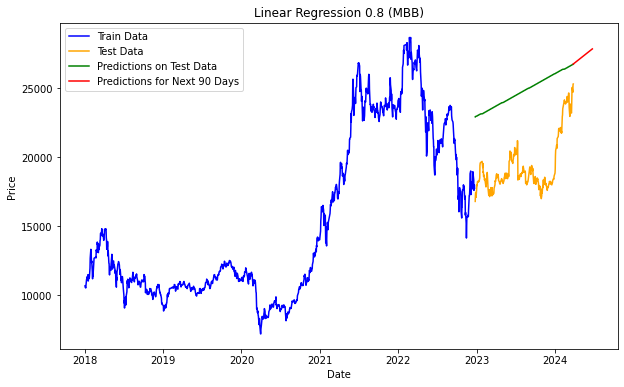

<Figure size 432x288 with 0 Axes>

In [120]:
LinearRegression_prediction(name, data, 0.8, 90)

**MBB 9:1**

Testing RMSE: 4114.666840978924
Testing MAE: 3621.5548357284315
Testing MAPE: 19.495638718960933


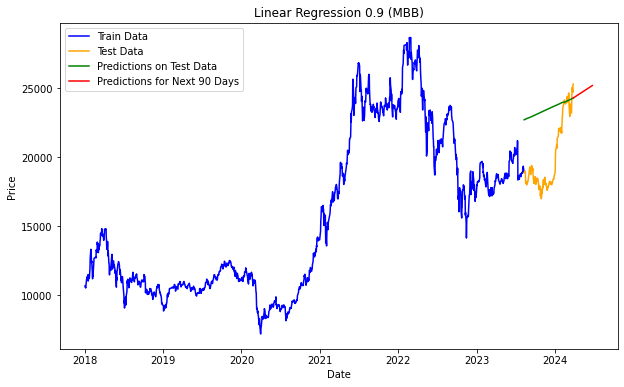

<Figure size 432x288 with 0 Axes>

In [121]:
LinearRegression_prediction(name, data, 0.9, 90)